####Importing Libraries

In [1]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram

####Loading Data

In [2]:
df=pd.read_csv('stack_network_links.csv')
df=df.drop(columns="value")
df

,source,target
0,azure,.net
1,sql-server,.net
2,asp.net,.net
3,entity-framework,.net
4,wpf,.net
...,...,...
485,objective-c,xcode
486,swift,xcode
487,iphone,xcode
488,ios,xcode


####Graph creation using Networkx


In [3]:
GG = nx.Graph()

for index, row in df.iterrows():
  if (GG.has_node(row[0]) == 0):
    GG.add_node(row[0])

  if (GG.has_node(row[1]) == 0):
     GG.add_node(row[1])

  GG.add_edge(row[0], row[1])

In [4]:
for n in GG.nodes():
    GG.nodes[n]['color'] = 'lavender' 

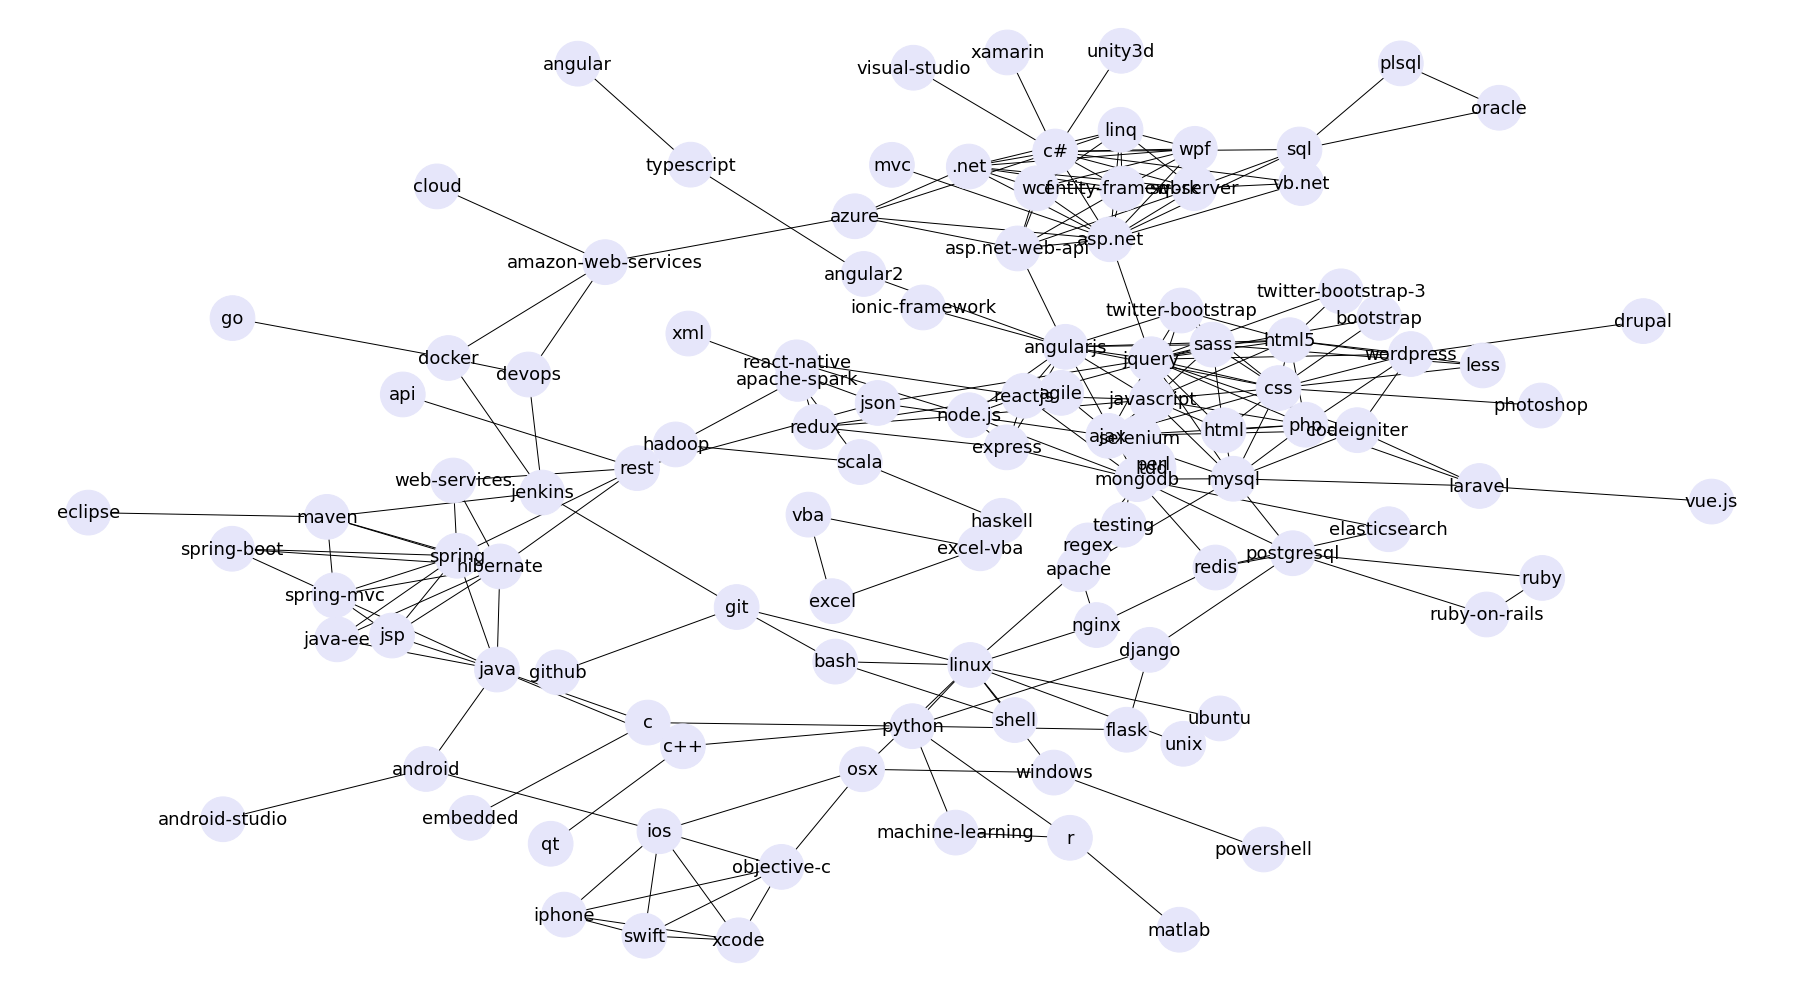

In [5]:
pos = nx.kamada_kawai_layout(GG)
colors = [node[1]['color'] for node in GG.nodes(data=True)]
nx.draw_networkx(GG, pos=pos, node_size=2000, labels={node:node for node in GG.nodes()},  node_color=colors, font_size=18)
plt.axis('off')
figure = plt.gcf()                      # get current figure
figure.set_size_inches(32, 18)          # set figure's size manually to your full screen (32x18)
plt.savefig('Graph.png', bbox_inches='tight') 
plt.show()

## Clustering begins

In [6]:
#Creation of adjacency matrix

id = list(range(len(GG)))
n = []
for node in GG:
  n.append(node)

id_dict = {n[i]: id[i] for i in range(len(id))}  

def graph_to_edge_matrix(G):                                  #function to generate adjacency matrix
    edge_mat = np.zeros((len(G), len(G)), dtype= int)         #creating dict of ids coz array indices cant be strings
       
    for node in G:
      for neighbor in G.neighbors(node):
        edge_mat[id_dict[node]][id_dict[neighbor]] = 1
      edge_mat[id_dict[node]][id_dict[node]] = 1
    return edge_mat

In [7]:
edge_mat = graph_to_edge_matrix(GG)
edge_mat

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

### Dendrogram generation to find the suitable number of clusters

In [8]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [9]:
#applying model to create dendrogram
model_ = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model_ = model_.fit(edge_mat)

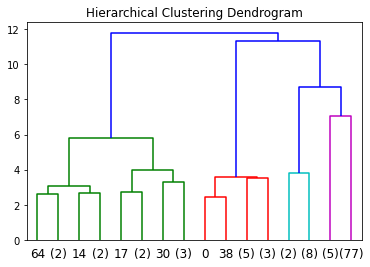

In [10]:
plot_dendrogram(model_, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.savefig('Dendrogram.png', bbox_inches='tight') 
plt.show()

In [11]:
# Fitting model again for certain number of cluster
k_clusters = 9
results = []
algorithms = {}

algorithms = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")
algorithms.fit(edge_mat)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=9)

In [15]:
res = []
for i in range(len(n)):
    res.append([n[i],algorithms.labels_[i]])
cluster_dict = {}
for i in range(0,9):
  l = []
  for each in res:
    if each[1]==i:
      l.append(each[0])
  cluster_dict[i] = l
cluster_dict

{0: ['tdd',
  'agile',
  'json',
  'cloud',
  'amazon-web-services',
  'devops',
  'docker',
  'android',
  'android-studio',
  'typescript',
  'angular',
  'angular2',
  'ionic-framework',
  'scala',
  'apache-spark',
  'hadoop',
  'api',
  'sql',
  'mvc',
  'vb.net',
  'bootstrap',
  'c++',
  'c',
  'python',
  'embedded',
  'xamarin',
  'unity3d',
  'visual-studio',
  'qt',
  'laravel',
  'photoshop',
  'less',
  'jenkins',
  'django',
  'flask',
  'go',
  'drupal',
  'eclipse',
  'vba',
  'excel',
  'excel-vba',
  'haskell',
  'twitter-bootstrap-3',
  'xml',
  'vue.js',
  'machine-learning',
  'r',
  'matlab',
  'oracle',
  'plsql',
  'regex',
  'perl',
  'testing',
  'selenium'],
 1: ['jquery',
  'css',
  'javascript',
  'angularjs',
  'sass',
  'twitter-bootstrap',
  'html5'],
 2: ['azure',
  '.net',
  'sql-server',
  'asp.net',
  'entity-framework',
  'wpf',
  'linq',
  'wcf',
  'c#',
  'asp.net-web-api'],
 3: ['java',
  'rest',
  'maven',
  'jsp',
  'hibernate',
  'spring-boot'